In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [3]:
# url = "https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction"
df = pd.read_csv(r"C:\Users\Somesh\Downloads\archive (2)\Churn_Modelling.csv")

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric columns with median
df.fillna(df.mode().iloc[0], inplace=True)  # Fill categorical columns with mode

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [8]:
df.isnull().sum()


RowNumber            0
CustomerId           0
CreditScore          0
Age                  0
Tenure               0
                    ..
Surname_Zuyev        0
Surname_Zuyeva       0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
Length: 2945, dtype: int64

In [9]:
df.describe() 


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
# Feature Selection and Split data into features (X) and target (y)
X = df.drop('Exited', axis=1)  # 'Exited' is the target column
y = df['Exited']  # The target variable (1 = churn, 0 = stay)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 3: Feature Scaling (important for some models like SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression:")
print("Accuracy:", accuracy_log_reg)
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression:
Accuracy: 0.781
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1607
           1       0.40      0.22      0.28       393

    accuracy                           0.78      2000
   macro avg       0.61      0.57      0.58      2000
weighted avg       0.74      0.78      0.76      2000

Confusion Matrix:
 [[1476  131]
 [ 307   86]]


In [13]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree:")
print("Accuracy:", accuracy_dt)
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree:
Accuracy: 0.814
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1607
           1       0.53      0.52      0.53       393

    accuracy                           0.81      2000
   macro avg       0.71      0.70      0.70      2000
weighted avg       0.81      0.81      0.81      2000

Confusion Matrix:
 [[1422  185]
 [ 187  206]]


In [14]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest:")
print("Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.859
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.84      0.35      0.49       393

    accuracy                           0.86      2000
   macro avg       0.85      0.67      0.70      2000
weighted avg       0.86      0.86      0.83      2000

Confusion Matrix:
 [[1582   25]
 [ 257  136]]


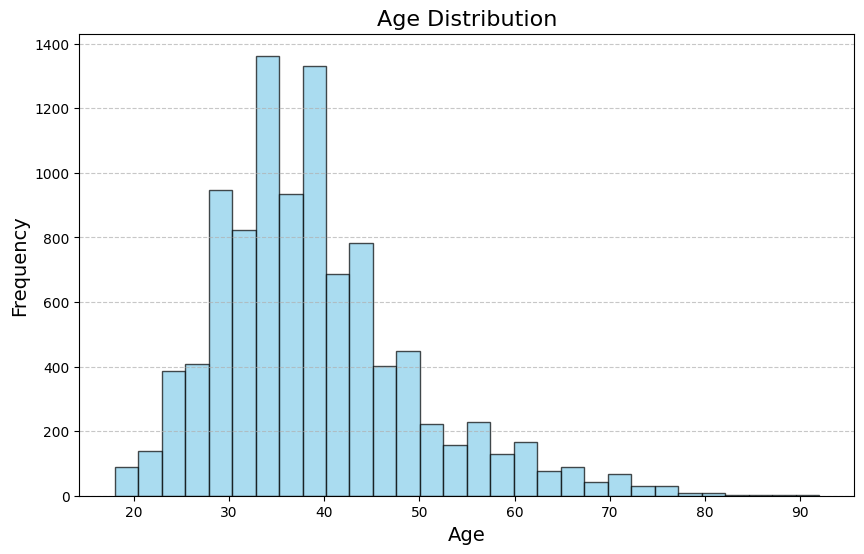

In [18]:
import matplotlib.pyplot as plt

# Plotting the histogram for the 'Age' column
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [15]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_svm)
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine:
Accuracy: 0.7915
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1607
           1       0.21      0.02      0.04       393

    accuracy                           0.79      2000
   macro avg       0.51      0.50      0.46      2000
weighted avg       0.69      0.79      0.72      2000

Confusion Matrix:
 [[1574   33]
 [ 384    9]]


In [16]:
models_accuracy = {
    "Logistic Regression": accuracy_log_reg,
    "Decision Tree": accuracy_dt,
    "Random Forest": accuracy_rf,
    "Support Vector Machine": accuracy_svm
}

best_model_name = max(models_accuracy, key=models_accuracy.get)
best_model_accuracy = models_accuracy[best_model_name]

print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy}")


Best Model: Random Forest with Accuracy: 0.859


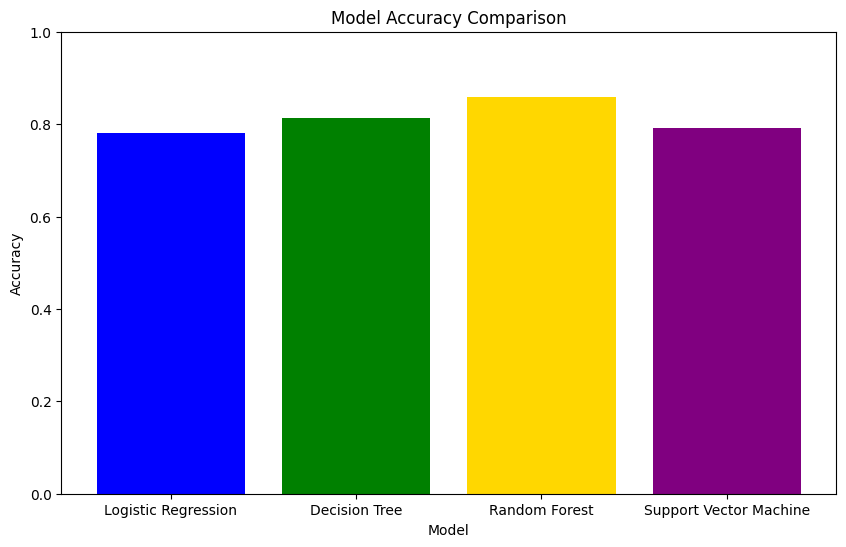


Best Model: Random Forest with Accuracy: 0.859


In [17]:
models_accuracy = {
    "Logistic Regression": accuracy_log_reg,
    "Decision Tree": accuracy_dt,
    "Random Forest": accuracy_rf,
    "Support Vector Machine": accuracy_svm
}

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models_accuracy.keys(), models_accuracy.values(), color=['blue', 'green', 'red', 'purple'])

# Highlight the best model with a different color
best_model_name = max(models_accuracy, key=models_accuracy.get)
plt.bar(best_model_name, models_accuracy[best_model_name], color='gold')

# Add labels and title
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy is between 0 and 1

# Display the plot
plt.show()

# Print the best model's name and accuracy
print(f"\nBest Model: {best_model_name} with Accuracy: {models_accuracy[best_model_name]}")